# Tarea 1
Esteban Parra 202123260

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

**Exercise 4.1 (Building Multilayer Perceptron)**

In [2]:
#Activation Function

def threshold_function(x, threshold=0):
    return 1 if x >= threshold else 0

def hyperbolic_tangent_function(x):
    return np.tanh(x)

def logistic_function(x,b=0.5):
    return 1 / (1 + np.exp(-x)) -b

def linear_function(x,b=1):
    return b*x

#Neurona



def multilayer_perceptron(inputs, weights_list, biases_list, functions_list):
    # Initialize history lists for inputs, weights, and biases
    input_history = [inputs]
    val_calculacos = []
    # Forward pass through the network
    
    for i in range(len(weights_list)): 
        layer_input = input_history[i]
        current_weights = weights_list[i]
        current_biases = biases_list[i]
        activation_function = functions_list[i]
      
        layer_input = np.dot(layer_input,current_weights)+current_biases
        val_calculacos.append(layer_input)
        valores = []
        for j in range(len(layer_input)):
            if len(activation_function[j])>1:
                valor =activation_function[j][0](layer_input[j],activation_function[j][1])
                valores.append(valor)
            else:
                valor =activation_function[j][0](layer_input[j])
                valores.append(valor)
        input_history.append(valores)    
    return input_history, input_history[-1][0]


**Ejercicio 4.1 a)**

Primer caso

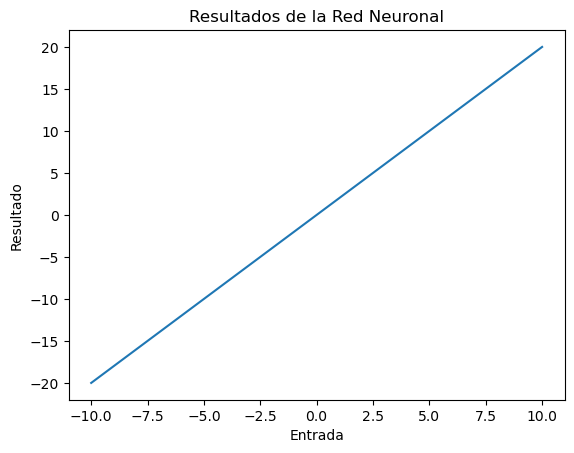

In [46]:
#f(x)=2x 
x = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]

w = [np.array([[1, 1]]),np.array([[1],[1]])]
bias = [np.array([0,0]),0]
activation_function = [[[linear_function],[linear_function]],[[linear_function]]]



# Calcular los resultados para cada valor de entrada
results = []

for input_value in x:
    result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
    results.append(output)

# Graficar los resultados
plt.plot(x, results)
plt.xlabel('Entrada')
plt.ylabel('Resultado')
plt.title('Resultados de la Red Neuronal')
plt.show()

Segundo caso,

Hidden layer with two logistic activation function and output layer with liner function 

Error:  0.0001949085174145971


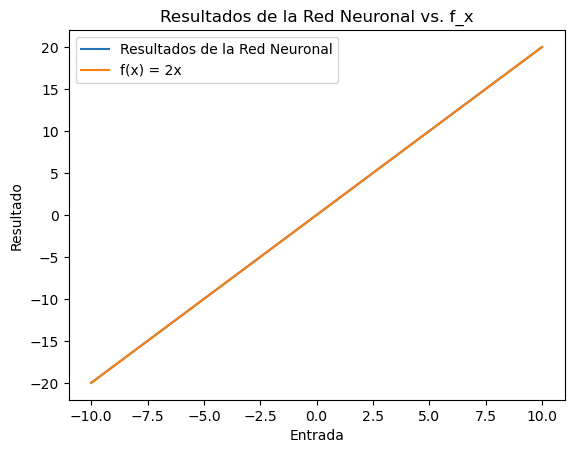

In [410]:
#f(x)=2x con tres 
x = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
x_ax = np.arange(-10, 11, 1)  # Valores de -10 a 10 con paso 1

w = [np.array([[0.008 , 0.00012]]), np.array([[1000], [10]])]
bias = [np.array([0,0]),0]
activation_function = [[[logistic_function],[logistic_function]],[[linear_function]]]



# Calcular los resultados para cada valor de entrada
results = []
archivos = []
for input_value in x:
    result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
    archivos.append(result)
    results.append(output)

# Graficar los resultados
f_x = 2*x_ax

# Calcular los residuos (diferencia entre f_x y resultados)

residuo = np.sum((f_x - results)**2)
print("Error: ", residuo)

# Graficar los resultados y la función f_x
plt.plot(x, results, label='Resultados de la Red Neuronal')
plt.plot(x_ax, f_x, label='f(x) = 2x')
plt.xlabel('Entrada')
plt.ylabel('Resultado')
plt.title('Resultados de la Red Neuronal vs. f_x')
plt.legend()

# Mostrar las gráficas
plt.show()

**Ejercicio 4.1 b)**



Hidden layer with two logistic activation function and output layer with liner function 

Residuo Cuadrático:  475.31737034201


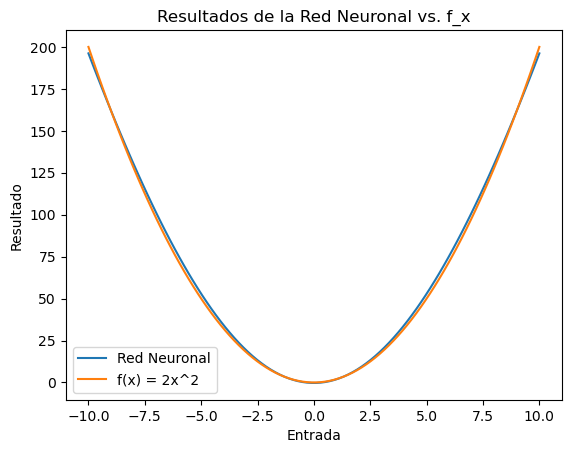

In [411]:
#f(x)=2x^2 con tres 
x = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]

x = np.linspace(-10, 10, 100)
x_ax = np.arange(-10, 11, 1)  # Valores de -10 a 10 con paso 1

#w = [np.array([[0.0981,-0.0981]]), np.array([[6100], [6100]])]
#bias = [np.array([-0.3149,-0.3149]),0]

w = [np.array([[0.0981,-0.0981]]), np.array([[2500], [2500]])]
bias = [np.array([-1.,-1.]),1155]
#940
activation_function = [[[logistic_function],[logistic_function]],[[linear_function]]]



# Calcular los resultados para cada valor de entrada
results = []
archivos = []
for input_value in x:
    result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
    archivos.append(result)
    results.append(output)

# Graficar los resultados
f_x = 2*x**2

# Calcular los residuos (diferencia entre f_x y resultados)
results = results
residuo = np.sum((f_x - results)**2)
print("Residuo Cuadrático: ", residuo)

# Graficar los resultados y la función f_x
plt.plot(x, results, label='Red Neuronal')
plt.plot(x, f_x, label='f(x) = 2x^2')
plt.xlabel('Entrada')
plt.ylabel('Resultado')
plt.title('Resultados de la Red Neuronal vs. f_x')
plt.legend()

# Mostrar las gráficas
plt.show()

**Ejercicio 4.1 c)**

Residuo Cuadrático:  1.609188801148407


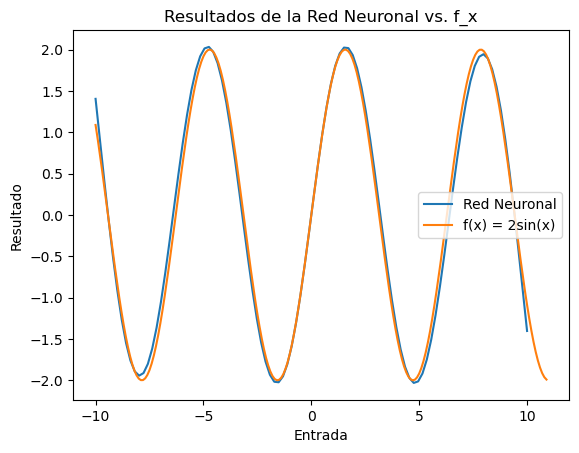

In [405]:
#f(x)=2sin^2 con tres 
x = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
x_ax = np.arange(-10, 11, 1)  # Valores de -10 a 10 con paso 1
x_ = np.arange(-10, 11, 0.1)

x = np.linspace(-10, 10, 100)
val = 1
borde = 6.4
amplitud = 11.3
w = [np.array([[-val,val,-val,val,-val,val,-val]]), np.array([[amplitud],[amplitud],[amplitud],[amplitud],[amplitud], [amplitud],[amplitud]])]
bias = [np.array([borde+borde/2,borde,borde/2,0,-borde/2,-borde,-(borde+borde/2)]),0]
activation_function = [[[logistic_function],[logistic_function],[logistic_function],[logistic_function],[logistic_function],[logistic_function],[logistic_function]],[[linear_function]]]

# Calcular los resultados para cada valor de entrada
results = []
archivos = []
for input_value in x:
    result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
    archivos.append(result)
    results.append(output)

# Graficar los resultados
f_x = 2*np.sin(x)
f_x_g = 2*np.sin(x_)
# Calcular los residuos (diferencia entre f_x y resultados)
results = results
residuo = np.sum((f_x - results)**2)
print("Residuo Cuadrático: ", residuo)

# Graficar los resultados y la función f_x
plt.plot(x, results, label='Red Neuronal')
plt.plot(x_, f_x_g, label='f(x) = 2sin(x)')
plt.xlabel('Entrada')
plt.ylabel('Resultado')
plt.title('Resultados de la Red Neuronal vs. f_x')
plt.legend()

# Mostrar las gráficas
plt.show()

**Radial Basis Function**

In [406]:
def receptive_field_1(x,c,sigma):
    exponent = - ( abs(x-c)/sigma)**2
    return np.e**exponent

def receptive_field_2(x,c,sigma):
    constante = - ( abs(x-c)/sigma)**2
    abajo = 1+ np.e**(constante)
    return 1/abajo
x = np.linspace(-10, 10, 100)

y = []

def radial_basis(x, b, f, values):
    y = []
    for i in range(len(f)):
        receptive = b[i]*f[i](x, values[i][0], values[i][1])
        y.append(receptive)
    return np.sum(np.array(y))

Ecuación lineal $f(x)=2x$

Residuo Cuadrático:  3.008887184075456


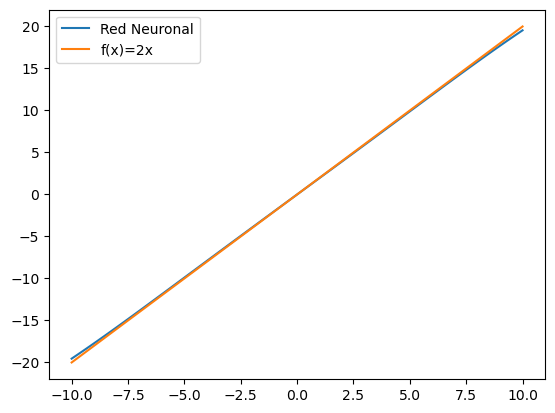

In [407]:
y = []
f = [receptive_field_1,receptive_field_1]
b = [29, -29]
centro = 19
val = 15
f_x = 2*x
values = [[centro,val], [-centro,val]]
for every in x:
    y.append(radial_basis(every, b, f, values))

residuo = np.sum((f_x - y)**2)
print("Residuo Cuadrático: ", residuo)    
    
plt.plot(x,y, label='Red Neuronal')
plt.plot(x,f_x, label="f(x)=2x")
plt.legend()

Ecuación cuadrática $f(x)=2x^2$

Residuo Cuadrático:  386.16077304612287


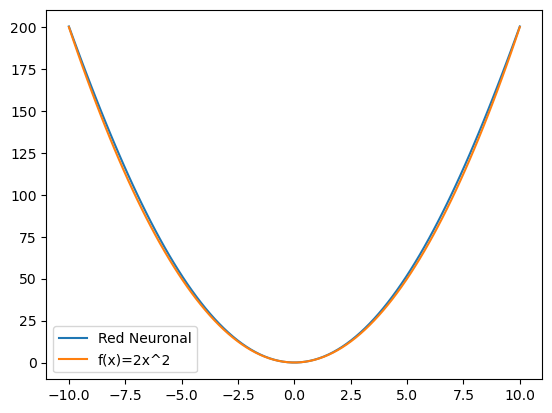

In [414]:
y = []
f = [receptive_field_2, receptive_field_2]

amp = 1200
b = [amp, -amp/2]
f_x = 2*x**2
val = 12
desfase = 300
values = [[0,val], [desfase,val]]
for every in x:
    y.append(radial_basis(every, b, f, values))

residuo = np.sum((f_x - y)**2)
print("Residuo Cuadrático: ", residuo)    
    
plt.plot(x,y, label='Red Neuronal')
plt.plot(x,f_x, label='f(x)=2x^2')
plt.legend()

Ecuación seno $f(x)=2sin(x)$

Residuo Cuadrático:  0.2814766556968799


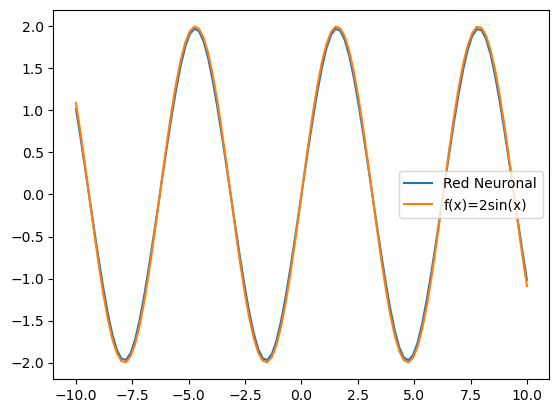

In [409]:
y = []
f = [receptive_field_1, receptive_field_1,receptive_field_1, receptive_field_1,receptive_field_1,receptive_field_1,receptive_field_1, receptive_field_1 ]
b = [2,-2,2,-2,2,-2,2,-2]
centro = 0
val = 1.4
centro = np.pi/2

f_x = 2*np.sin(x)
values = [[-7*centro,val], [-5*centro,val],[-3*centro,val],[-centro,val],[centro,val], [centro*3,val], [centro*5,val],[centro*7,val] ]
for every in x:
    y.append(radial_basis(every, b, f, values))

residuo = np.sum((f_x - y)**2)
print("Residuo Cuadrático: ", residuo)    
    
plt.plot(x,y, label='Red Neuronal')
plt.plot(x,f_x, label='f(x)=2sin(x)')
plt.legend()

**Gráficas del 5.5**

El resultado del centro promedio (center average) es: -0.023271056693257724


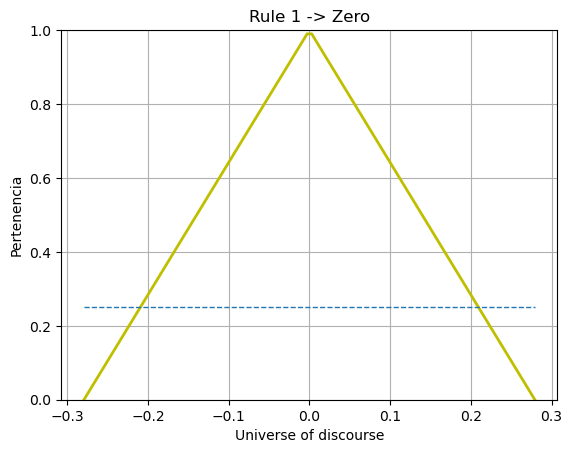

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Definir los rangos y valores de pertenencia para los fuzzy sets implicados
x1 = np.linspace(-16 * np.pi / 180, 16 * np.pi / 180, 100)
x2 = np.linspace(-24 * np.pi / 180, 8 * np.pi / 180, 100)
x3 = np.linspace(-8 * np.pi / 180, 24 * np.pi / 180, 100)
x4 = np.linspace(-16 * np.pi / 180, 16 * np.pi / 180, 100)

# Definir las alturas de los conjuntos difusos
h1, h2, h3, h4 = 0.5, 0.5, 0.25, 0.25

# Definir las funciones de membresía para los conjuntos difusos
y1 = fuzz.trimf(x1, [-16 * np.pi / 180, 0, 16 * np.pi / 180])
y2 = fuzz.trimf(x2, [-24 * np.pi / 180, -8 * np.pi / 180, 8 * np.pi / 180])
y3 = fuzz.trimf(x3, [-8 * np.pi / 180, 8 * np.pi / 180, 24 * np.pi / 180])
y4 = fuzz.trimf(x4, [-16 * np.pi / 180, 0, 16 * np.pi / 180])

# Encontrar el centroide de cada conjunto difuso

centroides = [np.sum(x1 * y1) / np.sum(y1), np.sum(x2 * y2) / np.sum(y2), np.sum(x3 * y3) / np.sum(y3), np.sum(x4 * y4) / np.sum(y4)]
# Calcular el centro promedio
center_average = np.sum(((centroides[0] * h1) + (centroides[1] * h2) + (centroides[2] * h3) + (centroides[3] * h4)) / (h1+h2+h3+h4))

# Calcular el centroide promedio
center_average = ((-8*np.pi/180)*(0.5-((0.25)**2/2))+(8*np.pi/180)*(0.25-((0.25)**2/2)))/(h1+h2+h3+h4)
# Dibujar los fuzzy sets implicados con las líneas de centroide


plt.figure()
plt.plot(x4, y4, 'y', linewidth=2)
plt.plot([-16 * np.pi / 180, 16 * np.pi / 180], [h4, h4], '--', linewidth=1)
plt.title('Rule 1 -> Zero')
plt.xlabel('Universe of discourse')
plt.ylabel('Pertenencia')
plt.ylim([0, 1])
plt.grid(True)

# Mostrar el resultado del centroide promedio
print('Centro promedio es:', center_average)



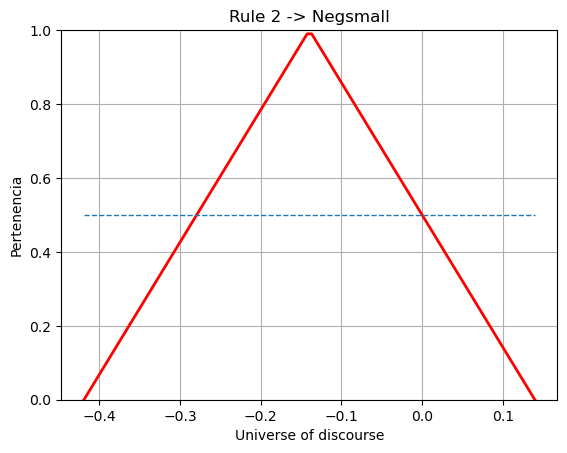

In [14]:
plt.figure()
plt.plot(x2, y2, 'r', linewidth=2)
plt.plot([-24 * np.pi / 180, 8 * np.pi / 180], [h2, h2], '--', linewidth=1)
plt.title('Rule 2 -> Negsmall')
plt.xlabel('Universe of discourse')
plt.ylabel('Pertenencia')
plt.ylim([0, 1])
plt.grid(True)


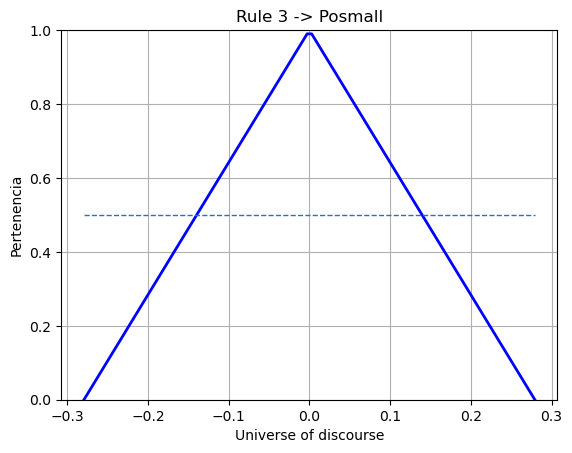

In [16]:
plt.figure()

plt.plot(x1, y1, 'b', linewidth=2)
plt.plot([-16 * np.pi / 180, 16 * np.pi / 180], [h1, h1], '--', linewidth=1)

plt.title('Rule 3 -> Posmall')
plt.xlabel('Universe of discourse')
plt.ylabel('Pertenencia')
plt.ylim([0, 1])
plt.grid(True)

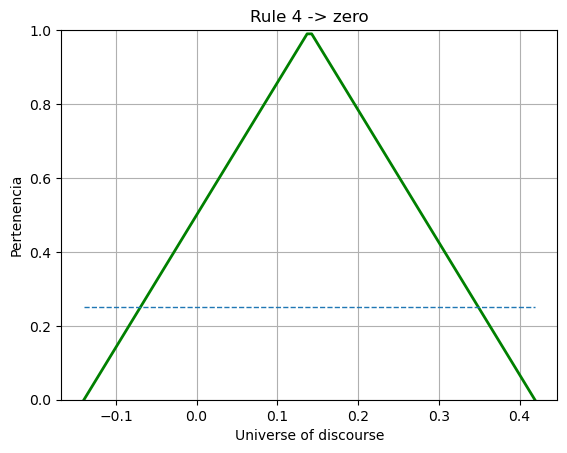

In [18]:
plt.figure()
plt.plot(x3, y3, 'g', linewidth=2)
plt.plot([-8 * np.pi / 180, 24 * np.pi / 180], [h3, h3], '--', linewidth=1)
plt.title("Rule 4 -> zero")
plt.xlabel('Universe of discourse')
plt.ylabel('Pertenencia')
plt.ylim([0, 1])
plt.grid(True)
